In [32]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 1

### First a sanity check to see if we generate graphs with $\left<k\right> = 10$

In [284]:
getVals = lambda x: list(dict(x).values())
getKeys = lambda x: list(dict(x).keys())

meanK = 10

G1 = nx.generators.erdos_renyi_graph(1000, meanK / 999)
G2 = nx.generators.watts_strogatz_graph(1000, 10, 0.1)
G3 = nx.generators.watts_strogatz_graph(1000, 10, 0.01)
G4 = nx.generators.barabasi_albert_graph(1000, 5)

[ np.mean(list(dict(G.degree).values())) for G in (G1, G2, G3, G4)]

[10.092, 10.0, 10.0, 9.95]

In [224]:
results = {
    "generator": [],
    "numNodes": [],
    "avgDeg": [],
    "2moment": [],
    "avgShortestPath": [],
    "avgClusterCoeff": [],
    "transitivity": [],
    "assortativity": []
}

def addResult(G, generator):
    results["generator"].append(generator)
    results["numNodes"].append(len(G.nodes))
    
    degs = np.array(getVals(G.degree))
    histX = np.arange(0, np.max(degs) + 1)
    histY = [ np.sum(degs == i) for i in histX ]
    histY = histY / np.sum(histY) # normalize
    moment1 = np.sum([ x*p      for x, p in zip(histX, histY) ])
    moment2 = np.sum([ x*(p**2) for x, p in zip(histX, histY) ])
    results["avgDeg"].append(moment1)
    results["2moment"].append(moment2)
    
    component = max(nx.components.connected_component_subgraphs(G), key=len)
    results["avgShortestPath"].append(nx.average_shortest_path_length(component))
    
    results["avgClusterCoeff"].append(nx.average_clustering(G))
    results["transitivity"].append(nx.transitivity(G))
    results["assortativity"].append(nx.assortativity.degree_assortativity_coefficient(G))

for i in range(30):
    print(i, end=" ")
    G1 = nx.generators.erdos_renyi_graph(1000, meanK / 999, seed=72+i)
    G2 = nx.generators.watts_strogatz_graph(1000, 10, 0.1, seed=72+i)
    G3 = nx.generators.watts_strogatz_graph(1000, 10, 0.01, seed=72+i)
    G4 = nx.generators.barabasi_albert_graph(1000, 5, seed=72+i)
    
    addResult(G1, "Erdos")
    addResult(G2, "Watts0.1")
    addResult(G3, "Watts0.01")
    addResult(G4, "Barabasi")

df = pd.DataFrame(results)
df

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

,generator,numNodes,avgDeg,2moment,avgShortestPath,avgClusterCoeff,transitivity,assortativity
0,Erdos,1000,10.044,0.870390,3.250919,0.010657,0.010629,-0.008743
1,Watts0.1,1000,10.000,3.274318,4.525021,0.507541,0.498448,-0.010800
2,Watts0.01,1000,10.000,8.726830,10.656440,0.653831,0.652959,-0.000707
3,Barabasi,1000,9.950,0.858444,2.996623,0.037308,0.029597,-0.042608
4,Erdos,1000,9.862,0.896934,3.273381,0.011182,0.010700,-0.002688
...,...,...,...,...,...,...,...,...
115,Barabasi,1000,9.950,0.856656,2.968631,0.042497,0.030608,-0.061973
116,Erdos,1000,9.888,0.919548,3.271441,0.008635,0.008496,0.017816
117,Watts0.1,1000,10.000,3.096036,4.452855,0.496982,0.488145,-0.004748
118,Watts0.01,1000,10.000,8.871078,10.681618,0.653909,0.653107,-0.006745


In [226]:
groups = df.groupby(by="generator")
mean = groups.mean()
std = groups.std()

### Mean:

In [227]:
mean

,numNodes,avgDeg,2moment,avgShortestPath,avgClusterCoeff,transitivity,assortativity
generator,,,,,,,
Barabasi,1000,9.950,0.854269,2.980822,0.039911,0.029691,-0.058270
Erdos,1000,9.994,0.886814,3.256810,0.010115,0.010064,-0.002618
Watts0.01,1000,10.000,8.302309,9.052121,0.648064,0.646797,0.002152
Watts0.1,1000,10.000,3.121811,4.445761,0.492419,0.483567,-0.010739


### Standard Deviation

In [228]:
std

,numNodes,avgDeg,2moment,avgShortestPath,avgClusterCoeff,transitivity,assortativity
generator,,,,,,,
Barabasi,0.0,1.277547e-15,0.010311,0.013834,0.003039,0.001184,0.009194
Erdos,0.0,1.296137e-01,0.022471,0.016686,0.000966,0.000937,0.012805
Watts0.01,0.0,1.189331e-15,0.285653,0.842908,0.003425,0.003650,0.010803
Watts0.1,0.0,1.277547e-15,0.131886,0.050624,0.007857,0.008176,0.016257


Degree distributions. Each row is:
1 - Erdos Renyi
2 - Watts-Strogatz p=0.01
3 - Watts-Strogatz p=0.1
4 - Barabasi-Albert



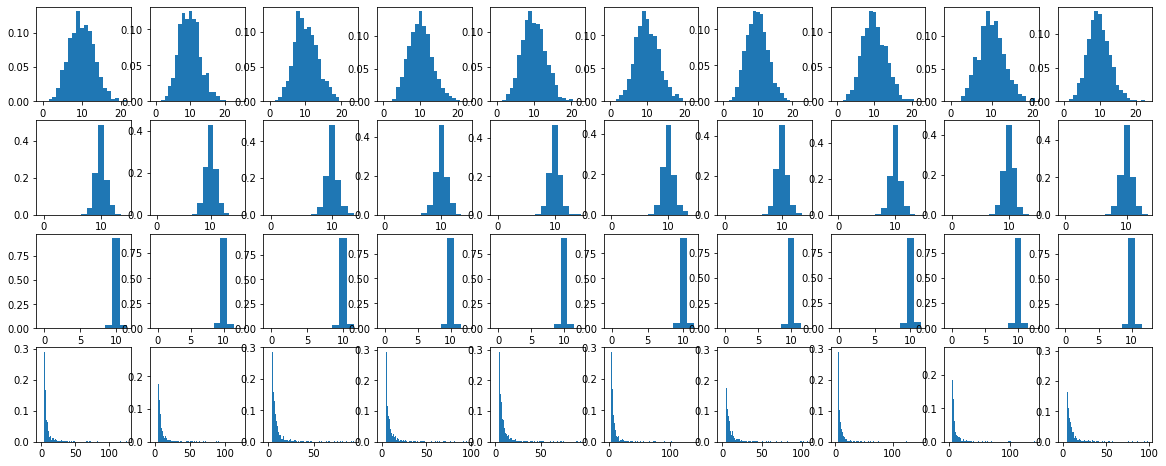

In [243]:
fig, ax = plt.subplots(nrows=4, ncols=10, figsize=(20, 8))

print("""Degree distributions. Each row is:
1 - Erdos Renyi
2 - Watts-Strogatz p=0.01
3 - Watts-Strogatz p=0.1
4 - Barabasi-Albert
""")

for i in range(10):
    G = nx.generators.erdos_renyi_graph(1000, meanK / 1000, seed=72+i)
    degs = getVals(G.degree)
    ax[0, i].hist(degs, bins=np.arange(-1, max(degs)+1) + 0.5, density=True)
    
for i in range(10):
    G = nx.generators.watts_strogatz_graph(1000, 10, 0.1, seed=72+i)
    degs = getVals(G.degree)
    ax[1, i].hist(degs, bins=np.arange(-1, max(degs)+1) + 0.5, density=True)

for i in range(10):
    G = nx.generators.watts_strogatz_graph(1000, 10, 0.01, seed=72+i)
    degs = getVals(G.degree)
    ax[2, i].hist(degs, bins=np.arange(-1, max(degs)+1) + 0.5, density=True)

for i in range(10):
    G = nx.generators.barabasi_albert_graph(1000, 5, seed=72+i)
    degs = getVals(G.degree)
    ax[3, i].hist(degs, bins=np.arange(-1, max(degs)+1) + 0.5, density=True)

### We see that Erdos-Renyi and Watts-Strogatz have degree distributions of similar shape, and they are not scale free. Barabasi-Albert is the only scale-free model here.

### We see high clustering coefficients and transitivity in both Watts-Strogatz models, so there must be a large number of triangles in such a graph. Despite this, the average shortest paths here were larger than I expected: the network is highly clustered, but the average distance is still quite high. 

### A large second moment for the shortest paths is observed for Watts-Strogatz with p = 0.01, which is almost nearly a regular graph; this is expected, as each of the few edge reconnections can cause shortest paths to vary a lot.

### Finally, all model showed assortativity near 0, reflecting their random nature. If we wanted the assortativity to be within a specific range, we would need to employ a model specific for this purpose.

# Problem 2

Text(0, 0.5, 'Nodes in Giant Component')

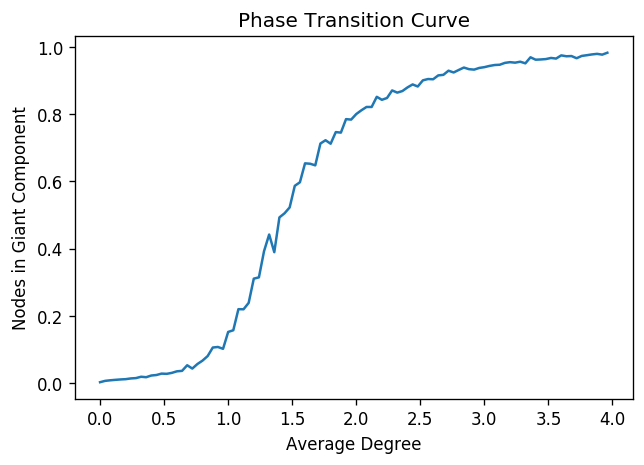

In [298]:
y = []
x = np.arange(0, 4, step=4/100)

NNODES = 300

for avgDeg in x:
    aux = []
    for i in range(20):
        giantComp = max(nx.connected_component_subgraphs(nx.erdos_renyi_graph(NNODES, avgDeg / (NNODES-1))), key=len)
        aux.append(len(giantComp.nodes) / NNODES)
    y.append(np.mean(aux))

plt.figure(dpi=120)
plt.plot(x, y)
plt.title("Phase Transition Curve")
plt.xlabel("Average Degree")
plt.ylabel("Nodes in Giant Component")

(4,100) (4,200) (4,300) (4,400) (4,500) (4,600) (4,700) (4,800) (4,900) (4,1000) (10,100) (10,200) (10,300) (10,400) (10,500) (10,600) (10,700) (10,800) (10,900) (10,1000) (20,100) (20,200) (20,300) (20,400) (20,500) (20,600) (20,700) (20,800) (20,900) (20,1000) (30,100) (30,200) (30,300) (30,400) (30,500) (30,600) (30,700) (30,800) (30,900) (30,1000) 

Text(0.5, 0, 'dMax')

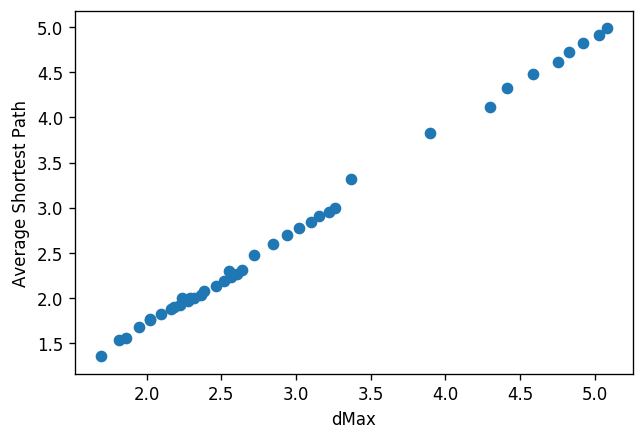

In [313]:
avgShortestPath = []
dMax = []

for avgDeg in (4, 10, 20, 30):
    for N in np.arange(100, 1001, step=100):
        print("({},{})".format(avgDeg, N), end=" ")
        avgSP = 0
        dM = 0
        nIter = 10

        for i in range(nIter):
            giantComp = max(nx.connected_component_subgraphs(nx.erdos_renyi_graph(N, avgDeg / (N-1))), key=len)
            avgSP += nx.average_shortest_path_length(giantComp)
            dM += np.log(N) / np.log(avgDeg)

        avgShortestPath.append(avgSP / nIter)
        dMax.append(dM / nIter)

plt.figure(dpi=120)
plt.scatter(avgShortestPath, dMax, cmap="rainbow")
plt.ylabel("Average Shortest Path")
plt.xlabel("dMax")

### The points lie on the line $y = x$, which characterizes small-world networks (though this did not work for average degrees lower than 4 when I tried earlier).

# Problem 3